In [1]:
from nli_16 import NLI_FullLinear_16M, NLI_PairsBasic_16M, NLI_Heads_16M, NLI_MiniHeads_16M
import torch
import torchsummary

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [2]:
from embgen import EmbeddingGenerator

emb_gen = EmbeddingGenerator(device=device)

emb_gen.model

MPNetModel(
  (embeddings): MPNetEmbeddings(
    (word_embeddings): Embedding(30527, 768, padding_idx=1)
    (position_embeddings): Embedding(514, 768, padding_idx=1)
    (LayerNorm): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
    (dropout): Dropout(p=0.1, inplace=False)
  )
  (encoder): MPNetEncoder(
    (layer): ModuleList(
      (0-11): 12 x MPNetLayer(
        (attention): MPNetAttention(
          (attn): MPNetSelfAttention(
            (q): Linear(in_features=768, out_features=768, bias=True)
            (k): Linear(in_features=768, out_features=768, bias=True)
            (v): Linear(in_features=768, out_features=768, bias=True)
            (o): Linear(in_features=768, out_features=768, bias=True)
            (dropout): Dropout(p=0.1, inplace=False)
          )
          (LayerNorm): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
          (dropout): Dropout(p=0.1, inplace=False)
        )
        (intermediate): MPNetIntermediate(
          (dense): Linear(in_

In [3]:
count = 0
for p in emb_gen.model.parameters():
    count += p.numel()

print(count)

109486464


In [4]:
count = 0
for p in emb_gen.model.parameters():
    if p.requires_grad:
        count += p.numel()

print(count)

14766720


In [6]:
for p in emb_gen.model.parameters():
    if p.requires_grad:
        print(p.numel())

589824
768
589824
768
589824
768
589824
768
768
768
2359296
3072
2359296
768
768
768
589824
768
589824
768
589824
768
589824
768
768
768
2359296
3072
2359296
768
768
768
384
589824
768


## 16M

In [2]:
nli = NLI_FullLinear_16M(device=device)
torchsummary.summary(nli, input_size=(6, 768))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Linear-1                 [-1, 2248]      10,361,032
         LayerNorm-2                 [-1, 2248]           4,496
            Linear-3                 [-1, 1024]       2,302,976
           Dropout-4                 [-1, 1024]               0
            Linear-5                  [-1, 512]         524,800
            Linear-6                   [-1, 64]          32,832
            Linear-7                    [-1, 1]              65
Total params: 13,226,201
Trainable params: 13,226,201
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.02
Forward/backward pass size (MB): 0.05
Params size (MB): 50.45
Estimated Total Size (MB): 50.53
----------------------------------------------------------------


In [3]:
nli = NLI_PairsBasic_16M(device=device)
torchsummary.summary(nli, input_size=(6, 768))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Linear-1              [-1, 5, 1024]       1,573,888
            Linear-2              [-1, 5, 1024]       1,049,600
           Dropout-3              [-1, 5, 1024]               0
            Linear-4                 [-1, 2048]      10,487,808
         LayerNorm-5                 [-1, 2048]           4,096
            Linear-6                 [-1, 1024]       2,098,176
           Dropout-7                 [-1, 1024]               0
            Linear-8                  [-1, 512]         524,800
            Linear-9                  [-1, 256]         131,328
           Linear-10                   [-1, 64]          16,448
           Linear-11                    [-1, 1]              65
Total params: 15,886,209
Trainable params: 15,886,209
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.02
Fo

In [5]:
nli = NLI_Heads_16M(device=device)
torchsummary.summary(nli, input_size=(6, 768))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Linear-1               [-1, 5, 728]       1,118,936
            Linear-2               [-1, 5, 728]       1,118,936
            Linear-3               [-1, 5, 728]       1,118,936
            Linear-4               [-1, 5, 728]       1,118,936
            Linear-5               [-1, 5, 728]       1,118,936
            Linear-6               [-1, 5, 728]       1,118,936
            Linear-7               [-1, 5, 728]       1,118,936
            Linear-8               [-1, 5, 728]       1,118,936
            Linear-9               [-1, 5, 256]         186,624
           Linear-10               [-1, 5, 256]         186,624
           Linear-11               [-1, 5, 256]         186,624
           Linear-12               [-1, 5, 256]         186,624
           Linear-13               [-1, 5, 256]         186,624
           Linear-14               [-1,

/home/ignacio/.local/lib/python3.10/site-packages/torch/nn/modules/linear.py:116: UserWarning: Attempting to run cuBLAS, but there was no current CUDA context! Attempting to set the primary context... (Triggered internally at ../aten/src/ATen/cuda/CublasHandlePool.cpp:135.)
  return F.linear(input, self.weight, self.bias)


In [6]:
nli = NLI_MiniHeads_16M(device=device)
torchsummary.summary(nli, input_size=(6, 768))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Linear-1               [-1, 5, 314]         482,618
            Linear-2               [-1, 5, 314]         482,618
            Linear-3               [-1, 5, 314]         482,618
            Linear-4               [-1, 5, 314]         482,618
            Linear-5               [-1, 5, 314]         482,618
            Linear-6               [-1, 5, 314]         482,618
            Linear-7               [-1, 5, 314]         482,618
            Linear-8               [-1, 5, 314]         482,618
            Linear-9               [-1, 5, 314]         482,618
           Linear-10               [-1, 5, 314]         482,618
           Linear-11               [-1, 5, 314]         482,618
           Linear-12               [-1, 5, 314]         482,618
           Linear-13                [-1, 5, 32]          10,080
           Linear-14               [-1,

## 4M

In [8]:
from nli_4 import NLI_FullLinear_4M, NLI_PairsBasic_4M, NLI_Heads_4M, NLI_MiniHeads_4M
import torch
import torchsummary

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [9]:
nli = NLI_FullLinear_4M(device=device)
torchsummary.summary(nli, input_size=(6, 768))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Linear-1                  [-1, 768]       3,539,712
         LayerNorm-2                  [-1, 768]           1,536
            Linear-3                  [-1, 256]         196,864
           Dropout-4                  [-1, 256]               0
            Linear-5                   [-1, 64]          16,448
            Linear-6                    [-1, 1]              65
Total params: 3,754,625
Trainable params: 3,754,625
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.02
Forward/backward pass size (MB): 0.02
Params size (MB): 14.32
Estimated Total Size (MB): 14.36
----------------------------------------------------------------


In [10]:
nli = NLI_PairsBasic_4M(device=device)
torchsummary.summary(nli, input_size=(6, 768))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Linear-1              [-1, 5, 1024]       1,573,888
            Linear-2               [-1, 5, 396]         405,900
           Dropout-3               [-1, 5, 396]               0
            Linear-4                  [-1, 798]       1,580,838
         LayerNorm-5                  [-1, 798]           1,596
            Linear-6                  [-1, 512]         409,088
           Dropout-7                  [-1, 512]               0
            Linear-8                  [-1, 256]         131,328
            Linear-9                    [-1, 1]             257
Total params: 4,102,895
Trainable params: 4,102,895
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.02
Forward/backward pass size (MB): 0.09
Params size (MB): 15.65
Estimated Total Size (MB): 15.76
-------------------------------------

In [11]:
nli = NLI_Heads_4M(device=device)
torchsummary.summary(nli, input_size=(6, 768))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Linear-1               [-1, 5, 512]         786,944
            Linear-2               [-1, 5, 512]         786,944
            Linear-3               [-1, 5, 512]         786,944
            Linear-4               [-1, 5, 512]         786,944
            Linear-5                [-1, 5, 64]          32,832
            Linear-6                [-1, 5, 64]          32,832
              head-7                [-1, 5, 64]               0
              head-8                [-1, 5, 64]               0
            Linear-9                [-1, 5, 64]          32,832
           Linear-10                [-1, 5, 64]          32,832
             head-11                [-1, 5, 64]               0
             head-12                [-1, 5, 64]               0
        LayerNorm-13                 [-1, 1280]           2,560
          Dropout-14                 [-

In [12]:
nli = NLI_MiniHeads_4M(device=device)
torchsummary.summary(nli, input_size=(6, 768))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Linear-1               [-1, 5, 256]         393,472
            Linear-2               [-1, 5, 256]         393,472
            Linear-3               [-1, 5, 256]         393,472
            Linear-4               [-1, 5, 256]         393,472
            Linear-5               [-1, 5, 256]         393,472
            Linear-6               [-1, 5, 256]         393,472
            Linear-7               [-1, 5, 256]         393,472
            Linear-8                [-1, 5, 32]           8,224
            Linear-9               [-1, 5, 256]         393,472
           Linear-10                [-1, 5, 32]           8,224
           Linear-11                [-1, 5, 32]           8,224
           Linear-12                [-1, 5, 32]           8,224
           Linear-13                [-1, 5, 32]           8,224
        mini_head-14                [-1

## 300k

In [1]:
from nli_300 import NLI_FullLinear_300k, NLI_PairsBasic_300k, NLI_Heads_300k, NLI_MiniHeads_300k
import torch
import torchsummary

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [2]:
nli = NLI_FullLinear_300k(device=device)
torchsummary.summary(nli, input_size=(6, 768))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Linear-1                   [-1, 64]         294,976
         LayerNorm-2                   [-1, 64]             128
           Dropout-3                   [-1, 64]               0
            Linear-4                   [-1, 32]           2,080
            Linear-5                    [-1, 8]             264
            Linear-6                    [-1, 1]               9
Total params: 297,457
Trainable params: 297,457
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.02
Forward/backward pass size (MB): 0.00
Params size (MB): 1.13
Estimated Total Size (MB): 1.15
----------------------------------------------------------------


In [3]:
nli = NLI_PairsBasic_300k(device=device)
torchsummary.summary(nli, input_size=(6, 768))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Linear-1               [-1, 5, 128]         196,736
           Dropout-2               [-1, 5, 128]               0
            Linear-3                  [-1, 128]          82,048
         LayerNorm-4                  [-1, 128]             256
            Linear-5                   [-1, 32]           4,128
            Linear-6                    [-1, 8]             264
            Linear-7                    [-1, 1]               9
Total params: 283,441
Trainable params: 283,441
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.02
Forward/backward pass size (MB): 0.01
Params size (MB): 1.08
Estimated Total Size (MB): 1.11
----------------------------------------------------------------


In [4]:
nli = NLI_Heads_300k(device=device)
torchsummary.summary(nli, input_size=(6, 768))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Linear-1                [-1, 5, 48]          73,776
            Linear-2                 [-1, 5, 8]             392
              head-3                 [-1, 5, 8]               0
            Linear-4                [-1, 5, 48]          73,776
            Linear-5                 [-1, 5, 8]             392
              head-6                 [-1, 5, 8]               0
            Linear-7                [-1, 5, 48]          73,776
            Linear-8                [-1, 5, 48]          73,776
            Linear-9                 [-1, 5, 8]             392
             head-10                 [-1, 5, 8]               0
           Linear-11                 [-1, 5, 8]             392
             head-12                 [-1, 5, 8]               0
        LayerNorm-13                  [-1, 160]             320
          Dropout-14                  [

/home/ignacio/.local/lib/python3.10/site-packages/torch/nn/modules/linear.py:116: UserWarning: Attempting to run cuBLAS, but there was no current CUDA context! Attempting to set the primary context... (Triggered internally at ../aten/src/ATen/cuda/CublasHandlePool.cpp:135.)
  return F.linear(input, self.weight, self.bias)


In [5]:
nli = NLI_MiniHeads_300k(device=device)
torchsummary.summary(nli, input_size=(6, 768))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Linear-1                [-1, 5, 24]          36,888
            Linear-2                 [-1, 5, 4]             100
         mini_head-3                 [-1, 5, 4]               0
            Linear-4                [-1, 5, 24]          36,888
            Linear-5                 [-1, 5, 4]             100
         mini_head-6                 [-1, 5, 4]               0
            Linear-7                [-1, 5, 24]          36,888
            Linear-8                [-1, 5, 24]          36,888
            Linear-9                [-1, 5, 24]          36,888
           Linear-10                 [-1, 5, 4]             100
           Linear-11                [-1, 5, 24]          36,888
           Linear-12                [-1, 5, 24]          36,888
           Linear-13                [-1, 5, 24]          36,888
           Linear-14                 [-

## Results NLI

Epoch: 0
Batch: 1/1


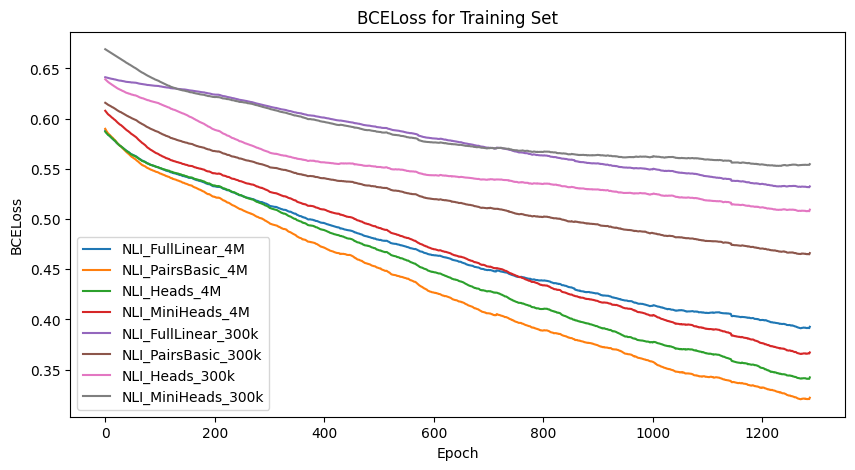

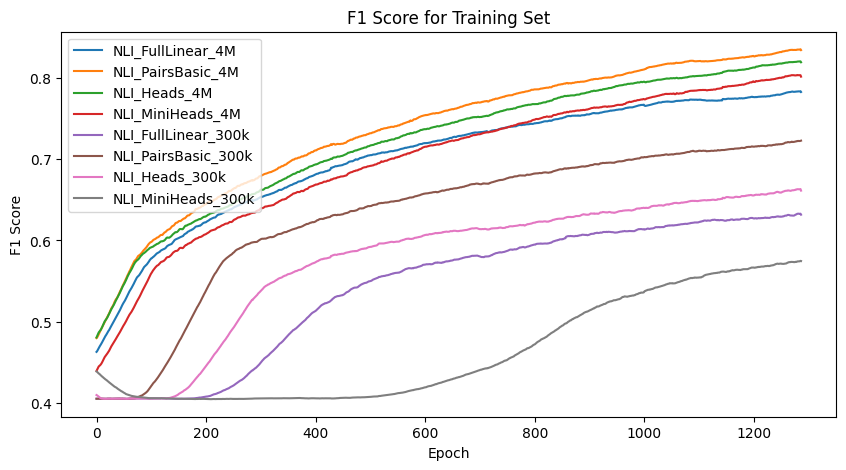

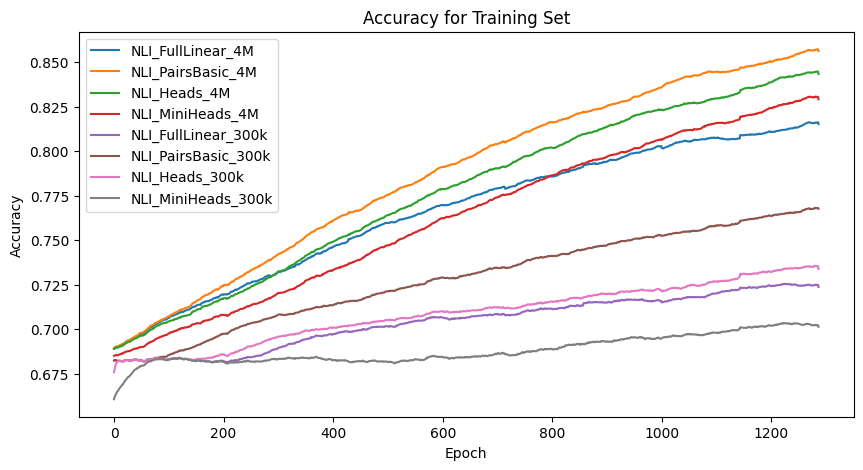

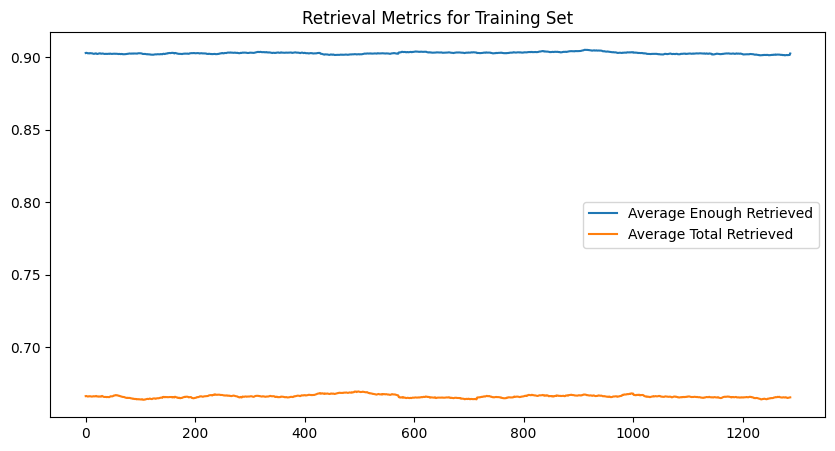

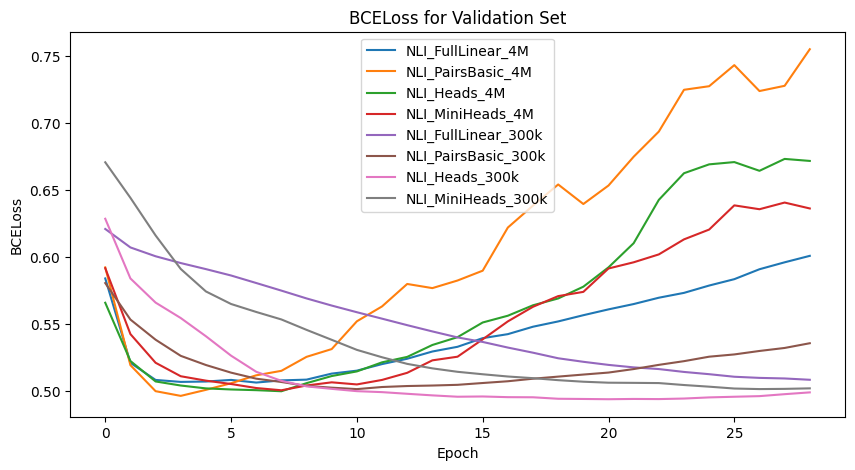

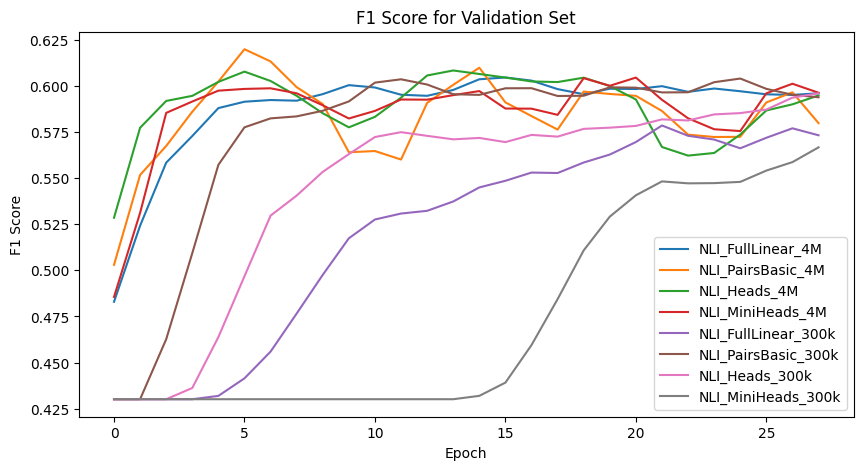

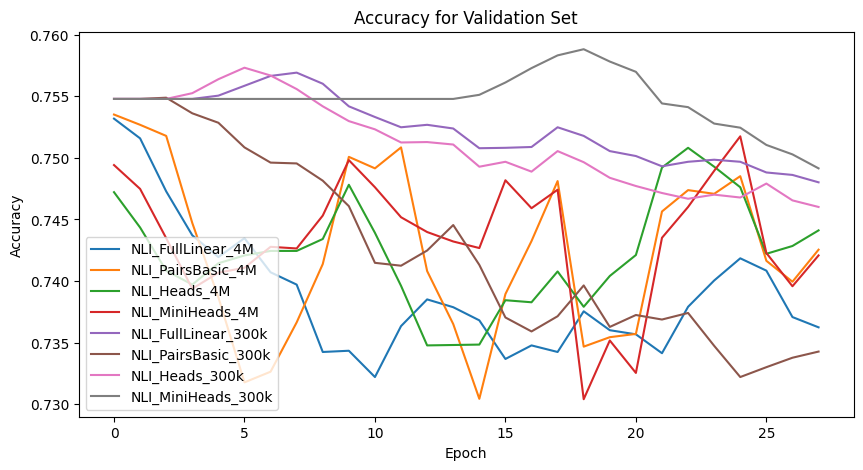

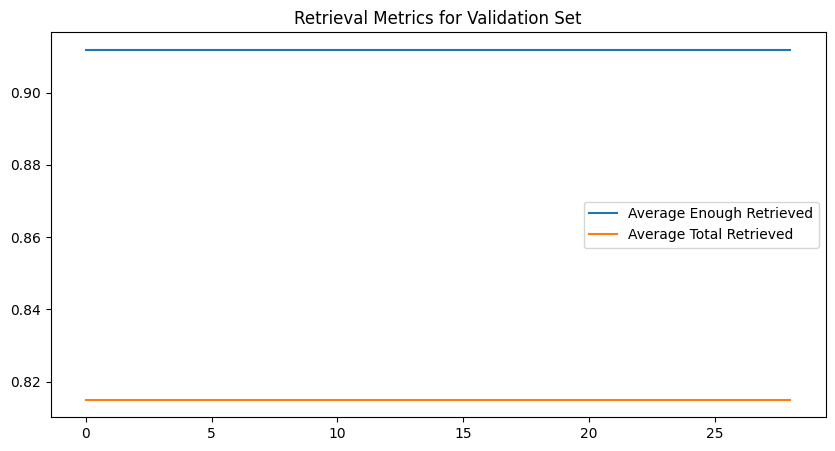

In [1]:
import json
from NLI_tests.other_utils import print_progress
# load tracking_train and tracking_eval from NLI_tests/results

with open("NLI_tests/results/tracking_train_v4_v300_1.json", "r") as f:
    tracking_train = json.load(f)

with open("NLI_tests/results/tracking_eval_v4_v300_1.json", "r") as f:
    tracking_eval = json.load(f)

print_progress(epoch=0, batch=1, num_total_batches=1, tracking_train=tracking_train, tracking_eval=tracking_eval, ma_ratio=0.1)

Epoch: 0
Batch: 1/1


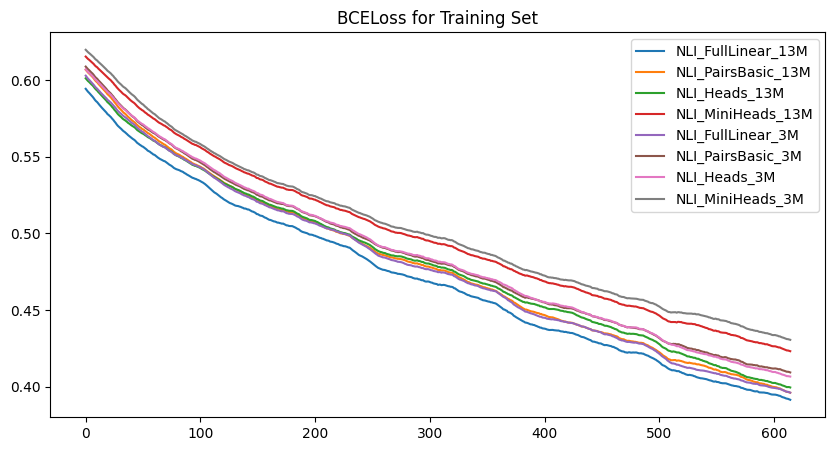

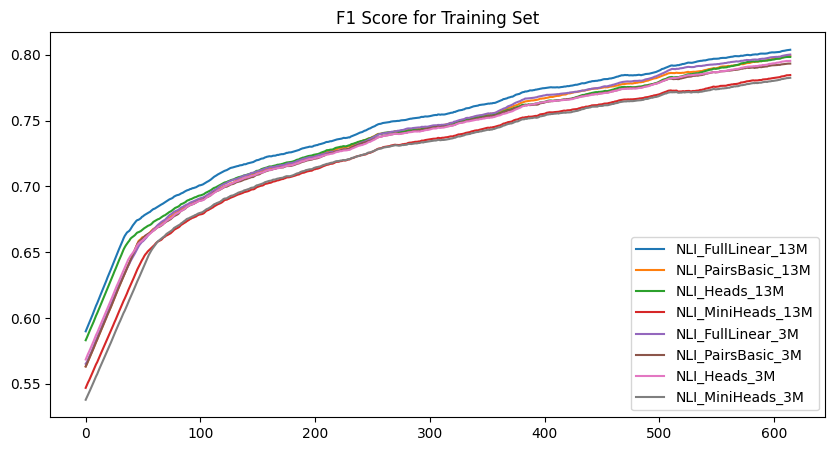

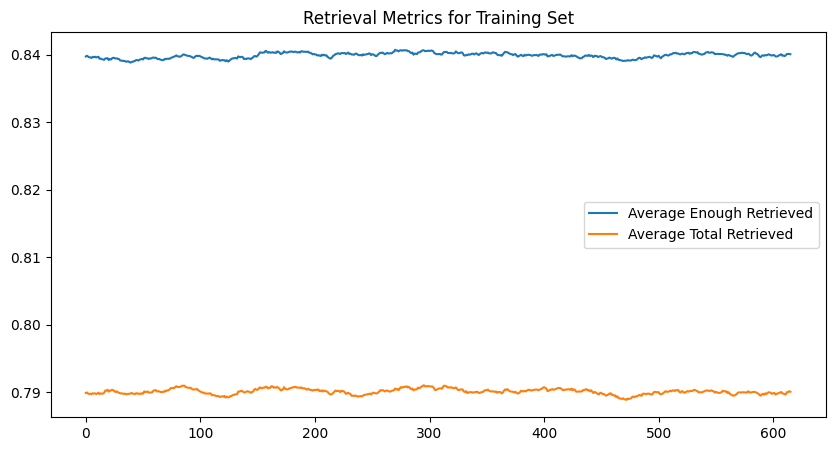

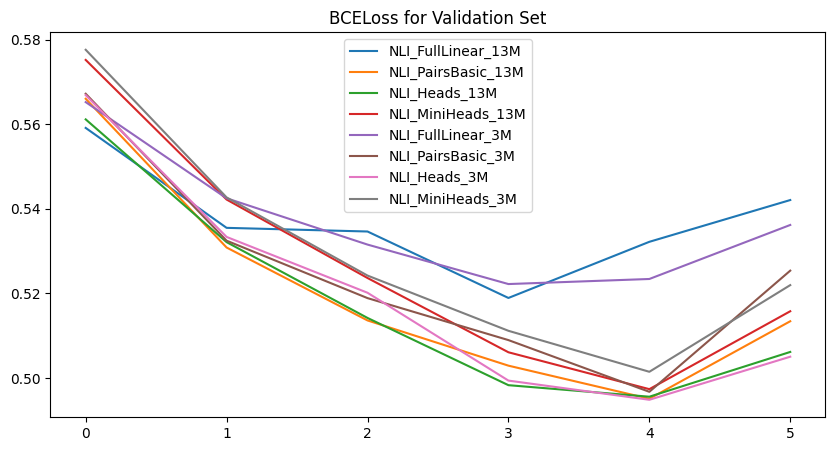

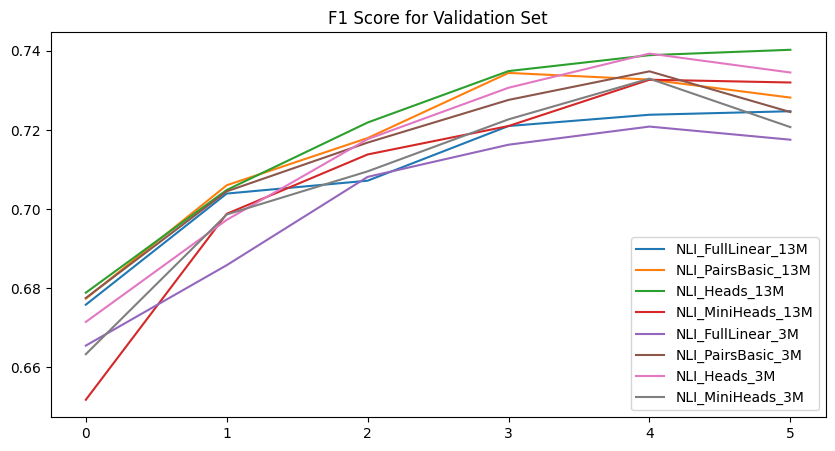

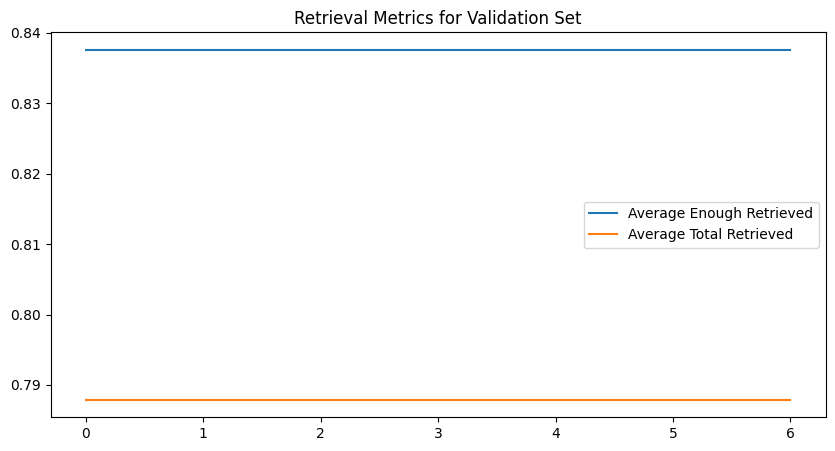

In [1]:
import json
from NLI_tests.other_utils import print_progress
# load tracking_train and tracking_eval from NLI_tests/results

with open("NLI_tests/results/tracking_train_v13_v3.json", "r") as f:
    tracking_train = json.load(f)

with open("NLI_tests/results/tracking_eval_v13_v3.json", "r") as f:
    tracking_eval = json.load(f)

print_progress(epoch=0, batch=1, num_total_batches=1, tracking_train=tracking_train, tracking_eval=tracking_eval, ma_ratio=0.2)

# Results Overall

Epoch: 0
Batch: 1/1


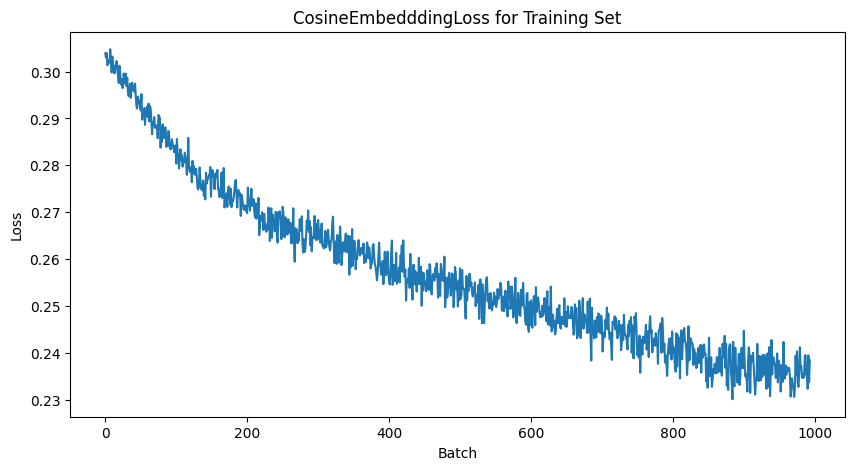

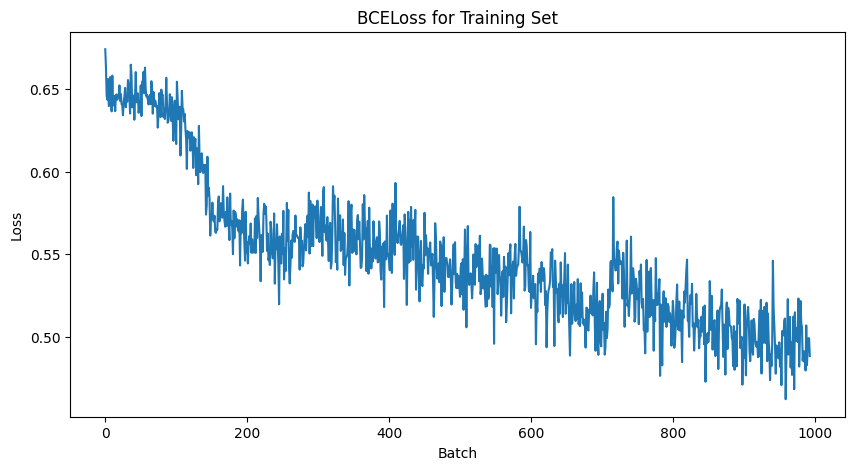

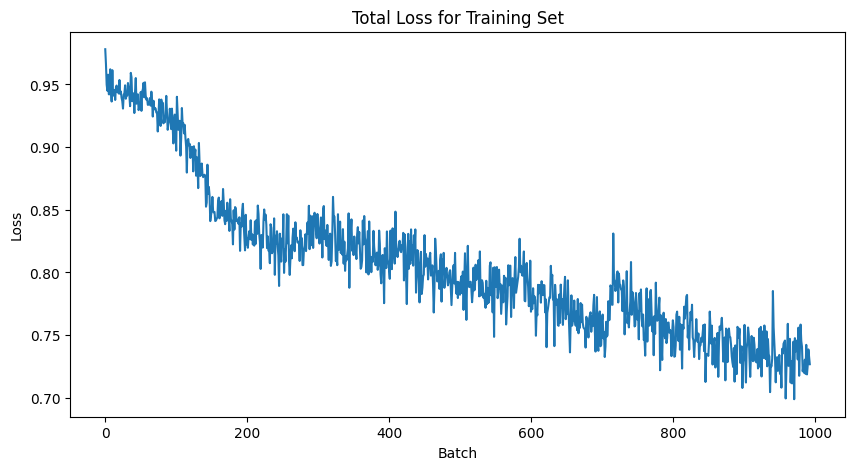

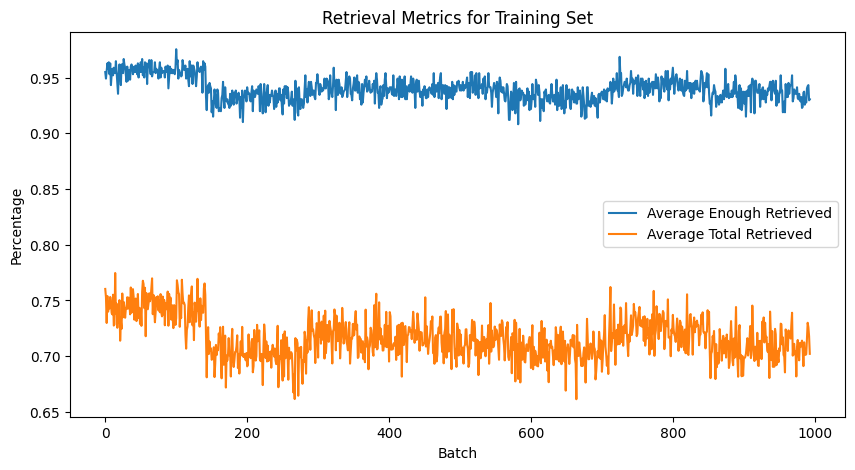

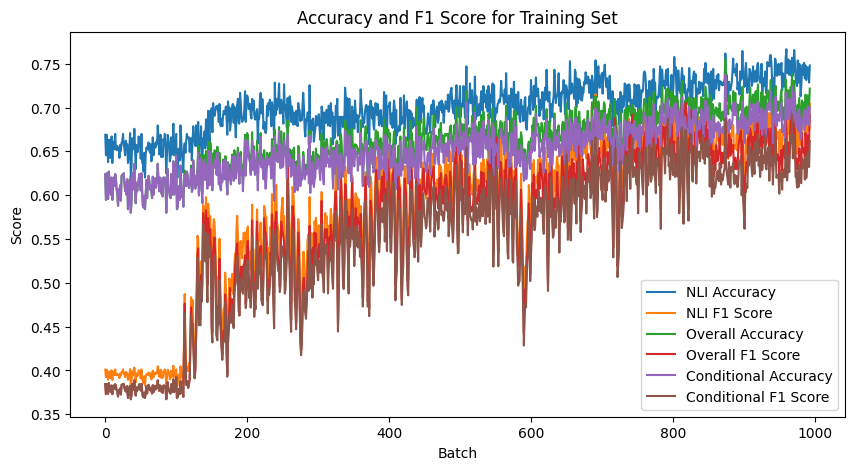

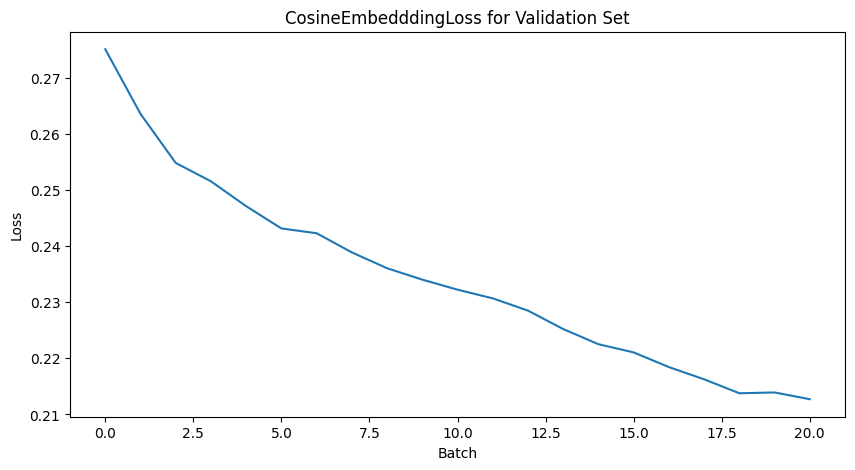

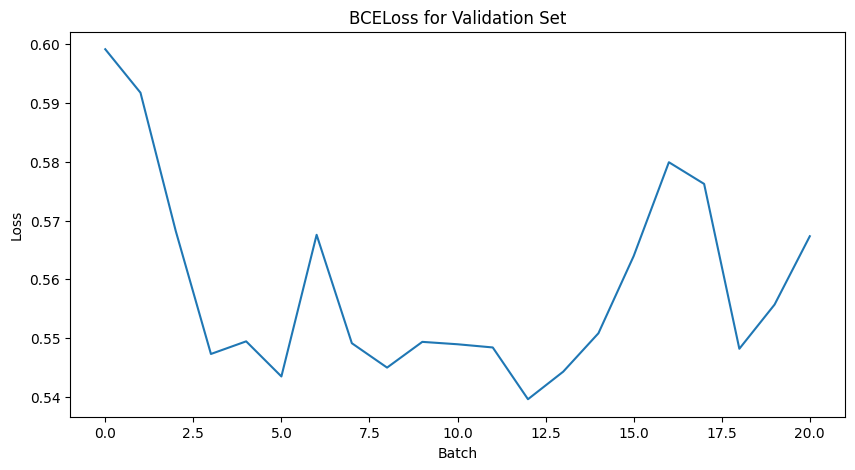

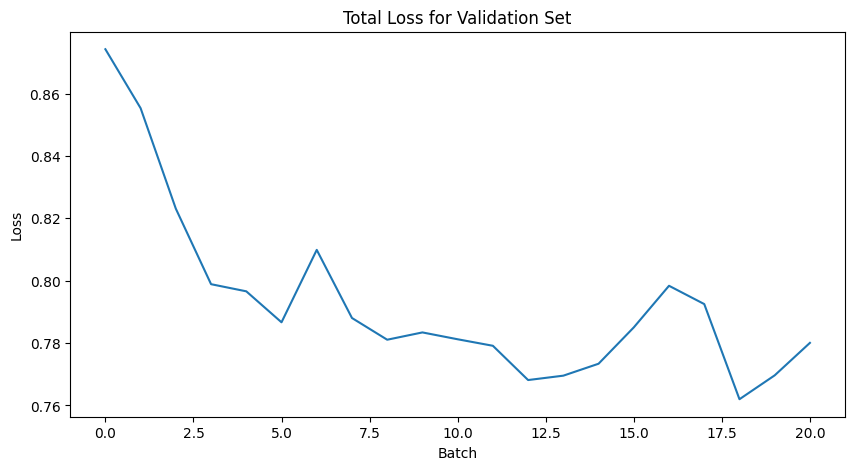

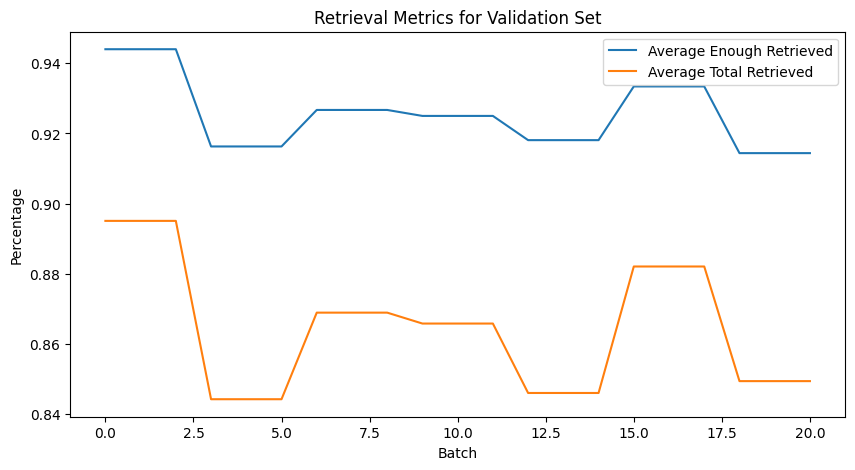

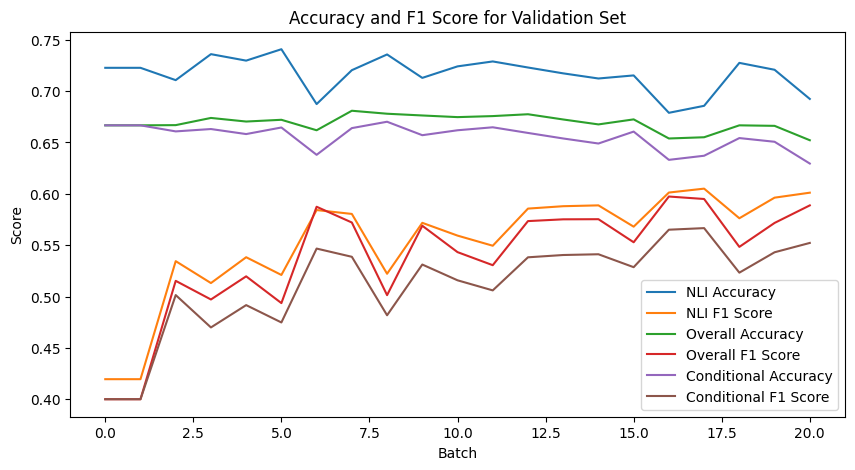

[0.6240234375, 0.5947265625, 0.625, 0.62109375, 0.595703125, 0.626953125, 0.6162109375, 0.60546875, 0.6005859375, 0.6201171875, 0.5947265625, 0.61328125, 0.6201171875, 0.6103515625, 0.6240234375, 0.6181640625, 0.6064453125, 0.6015625, 0.587890625, 0.6064453125, 0.6044921875, 0.611328125, 0.59375, 0.6220703125, 0.623046875, 0.6240234375, 0.625, 0.615234375, 0.6044921875, 0.6142578125, 0.6005859375, 0.6181640625, 0.583984375, 0.5966796875, 0.609375, 0.619140625, 0.580078125, 0.5927734375, 0.625, 0.6064453125, 0.6083984375, 0.6357421875, 0.60546875, 0.5908203125, 0.6142578125, 0.6044921875, 0.6123046875, 0.6171875, 0.6240234375, 0.6181640625, 0.60546875, 0.625, 0.6044921875, 0.587890625, 0.5859375, 0.5986328125, 0.583984375, 0.6015625, 0.6171875, 0.5966796875, 0.6171875, 0.6220703125, 0.6171875, 0.6064453125, 0.611328125, 0.6044921875, 0.5966796875, 0.62109375, 0.6005859375, 0.6142578125, 0.619140625, 0.6083984375, 0.619140625, 0.6142578125, 0.6357421875, 0.615234375, 0.6044921875, 0.6201

In [12]:
from other_utils import print_progress
import json

# load tracking_train and tracking_eval from metrics
with open("metrics/tracking_train_v2.json", "r") as f:
    tracking_train = json.load(f)

with open("metrics/tracking_eval_v2.json", "r") as f:
    tracking_eval = json.load(f)

# for tracking_train enough_retrieved and total_retrived, divide the series in 7 blocks of equal length
# and calculate their mean
l = int(len(tracking_train["average_enough_retrieved"])/6)

# tracking_train["average_enough_retrieved"] = [sum(tracking_train["average_enough_retrieved"][i*l:(i+1)*l])/l for i in range(0, 6)]
# tracking_train["average_total_retrieved"] = [sum(tracking_train["average_total_retrieved"][i*l:(i+1)*l])/l for i in range(0, 6)]
# tracking_train["overall_f1"] = [sum(tracking_train["overall_f1"][i*l:(i+1)*l])/l for i in range(0, 6)]
# tracking_train["overall_accuracy"] = [sum(tracking_train["overall_accuracy"][i*l:(i+1)*l])/l for i in range(0, 6)]

print_progress(epoch=0, batch=1, num_total_batches=1, tracking_train=tracking_train, tracking_eval=tracking_eval, ma_ratio=0.0)
print(tracking_train["conditional_accuracy"])

Epoch: 0
Batch: 1/1


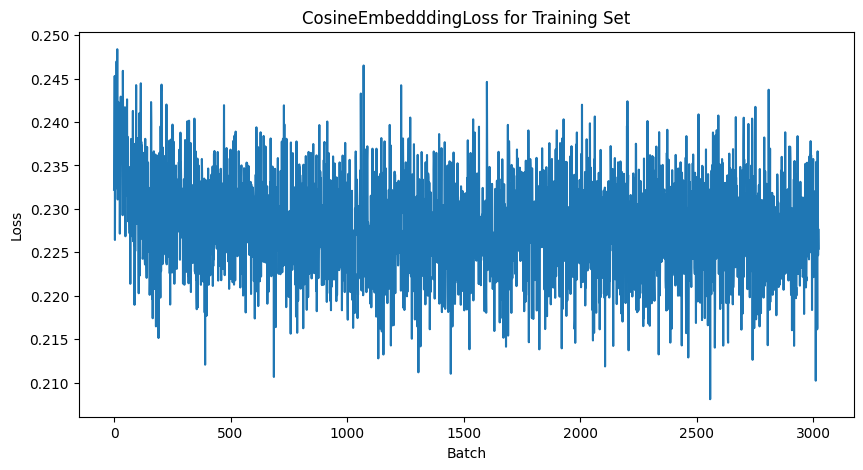

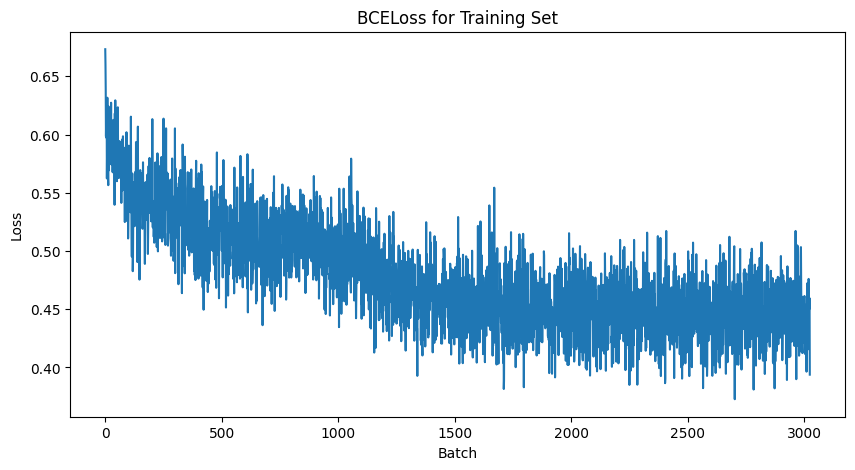

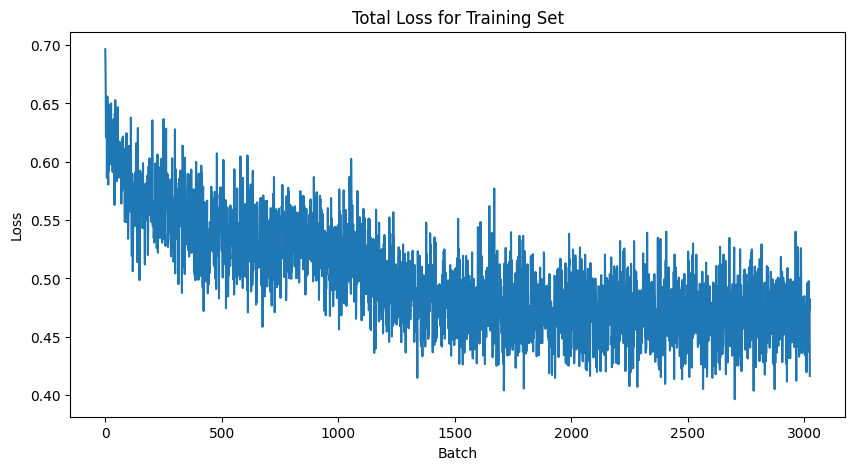

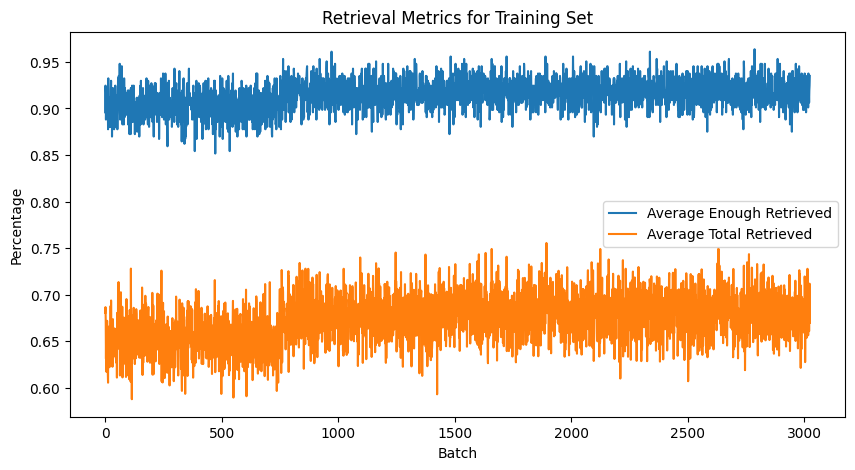

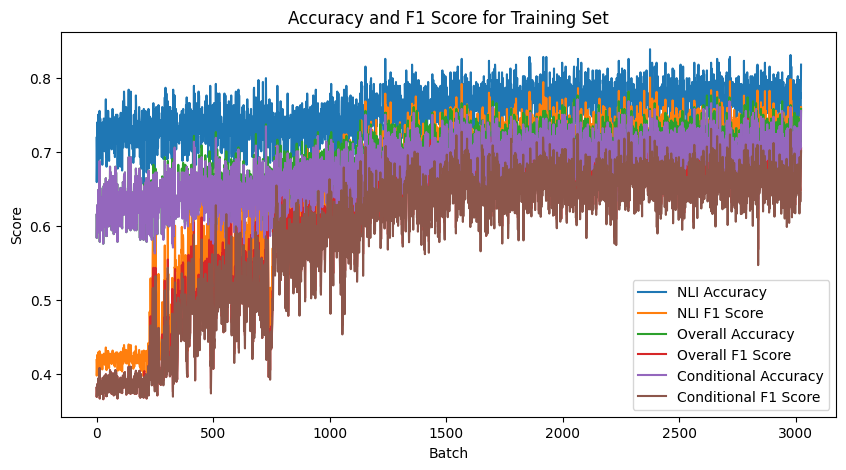

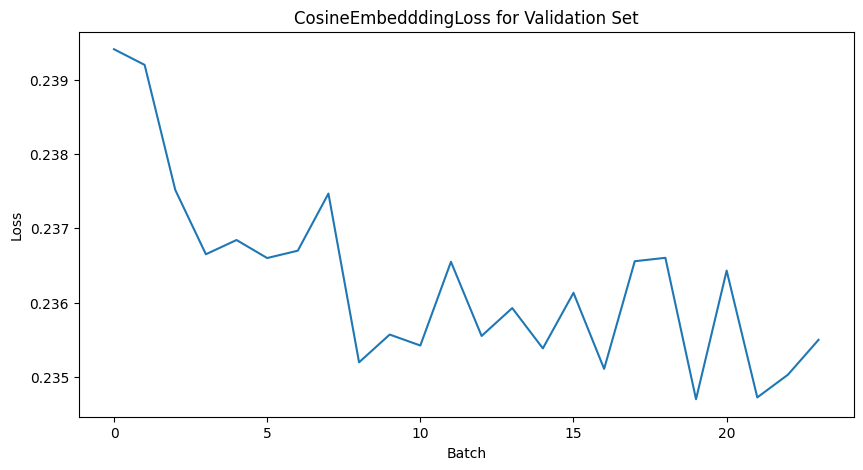

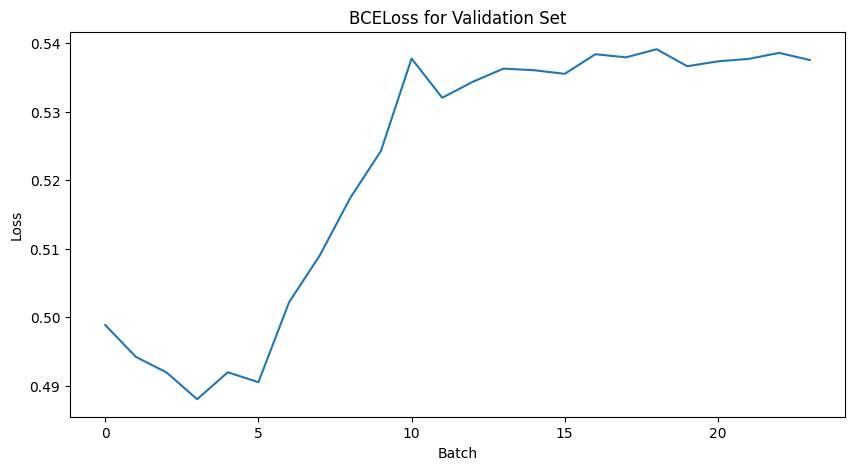

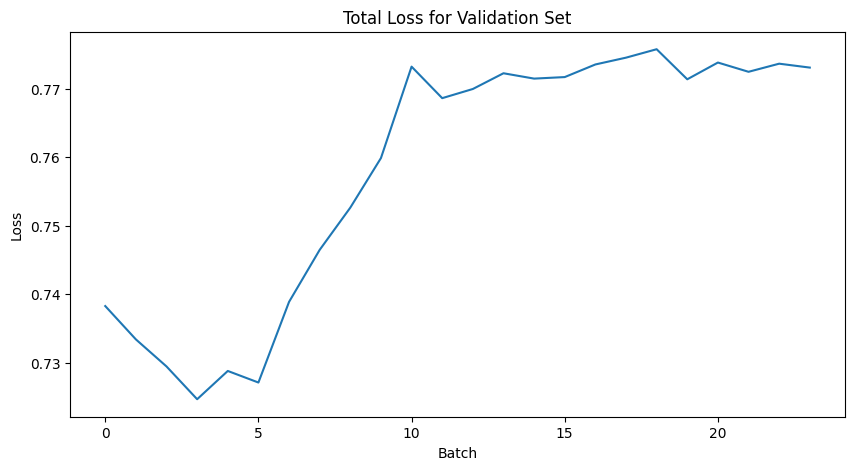

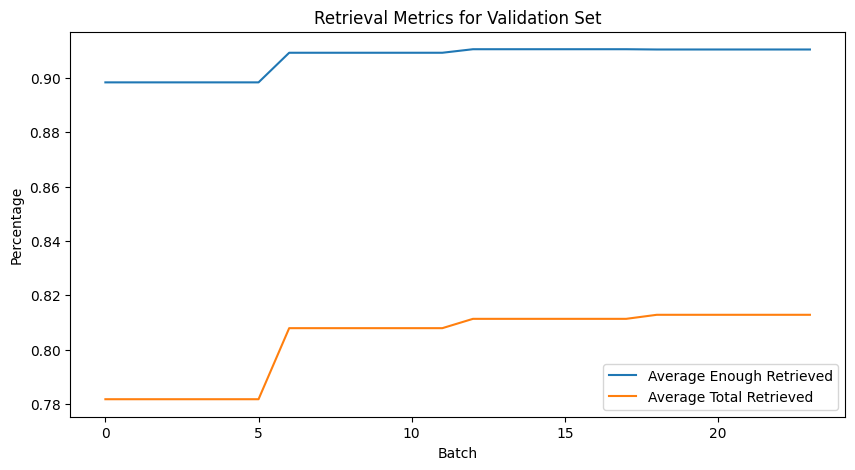

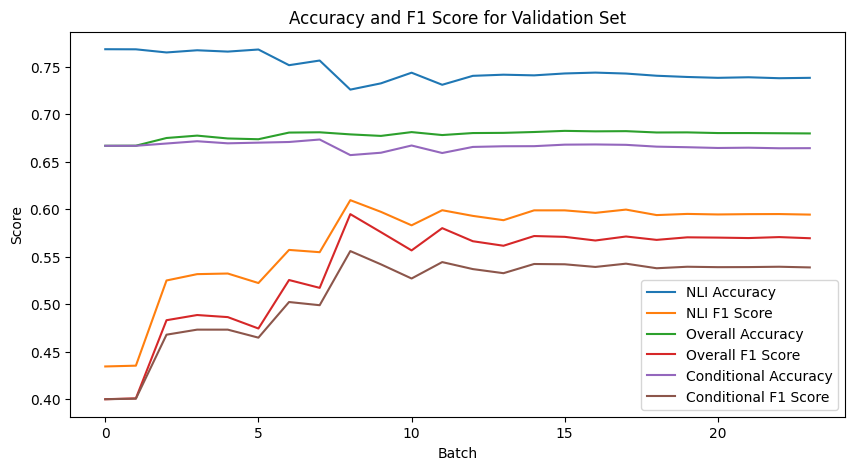

[0.6145833333333334, 0.5833333333333334, 0.5989583333333334, 0.6276041666666666, 0.6041666666666666, 0.6197916666666666, 0.6015625, 0.640625, 0.6484375, 0.5911458333333334, 0.6145833333333334, 0.6276041666666666, 0.6276041666666666, 0.6875, 0.578125, 0.6171875, 0.6510416666666666, 0.625, 0.6171875, 0.625, 0.609375, 0.6197916666666666, 0.59375, 0.6015625, 0.6380208333333334, 0.6119791666666666, 0.6380208333333334, 0.625, 0.6484375, 0.5755208333333334, 0.6354166666666666, 0.6536458333333334, 0.6432291666666666, 0.65625, 0.6276041666666666, 0.5989583333333334, 0.6223958333333334, 0.6458333333333334, 0.6197916666666666, 0.6171875, 0.6640625, 0.5911458333333334, 0.5859375, 0.6041666666666666, 0.5859375, 0.609375, 0.6328125, 0.6354166666666666, 0.6588541666666666, 0.6328125, 0.6536458333333334, 0.6354166666666666, 0.5989583333333334, 0.609375, 0.6015625, 0.6614583333333334, 0.6536458333333334, 0.6302083333333334, 0.6796875, 0.6354166666666666, 0.6328125, 0.6067708333333334, 0.671875, 0.62760

In [13]:
from other_utils import print_progress
import json

# load tracking_train and tracking_eval from metrics
with open("metrics/tracking_train_v4.json", "r") as f:
    tracking_train = json.load(f)

with open("metrics/tracking_eval_v4.json", "r") as f:
    tracking_eval = json.load(f)

# for tracking_train enough_retrieved and total_retrived, divide the series in 7 blocks of equal length
# and calculate their mean
l = int(len(tracking_train["average_enough_retrieved"])/6)

# tracking_train["average_enough_retrieved"] = [sum(tracking_train["average_enough_retrieved"][i*l:(i+1)*l])/l for i in range(0, 6)]
# tracking_train["average_total_retrieved"] = [sum(tracking_train["average_total_retrieved"][i*l:(i+1)*l])/l for i in range(0, 6)]
# tracking_train["overall_f1"] = [sum(tracking_train["overall_f1"][i*l:(i+1)*l])/l for i in range(0, 6)]
# tracking_train["overall_accuracy"] = [sum(tracking_train["overall_accuracy"][i*l:(i+1)*l])/l for i in range(0, 6)]

print_progress(epoch=0, batch=1, num_total_batches=1, tracking_train=tracking_train, tracking_eval=tracking_eval, ma_ratio=0.0)
print(tracking_train["conditional_accuracy"])

Epoch: 0
Batch: 1/1


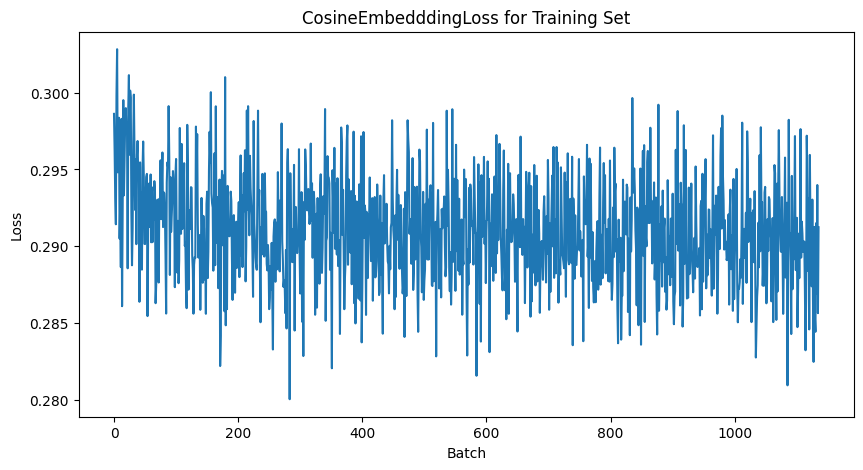

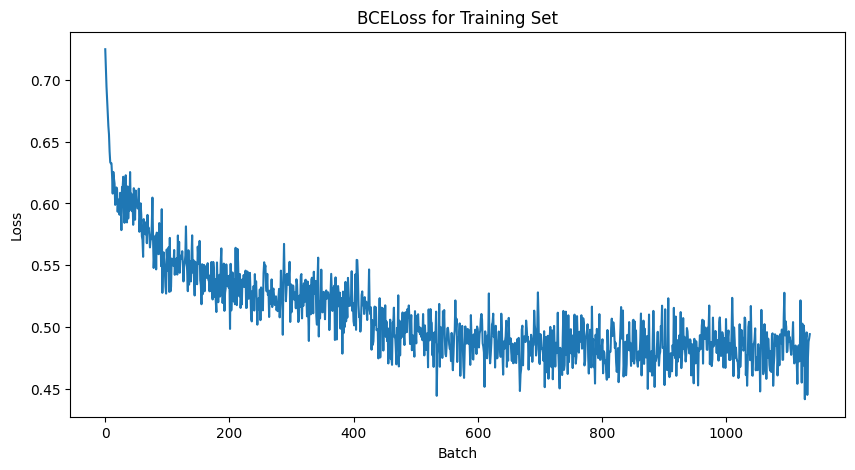

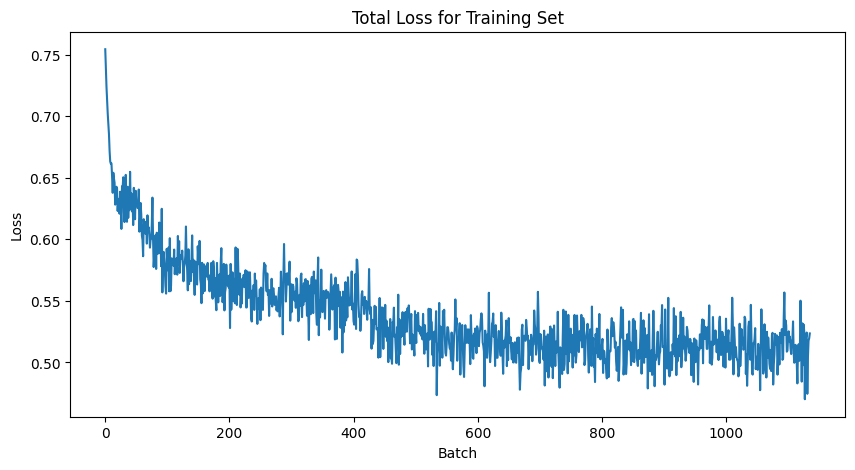

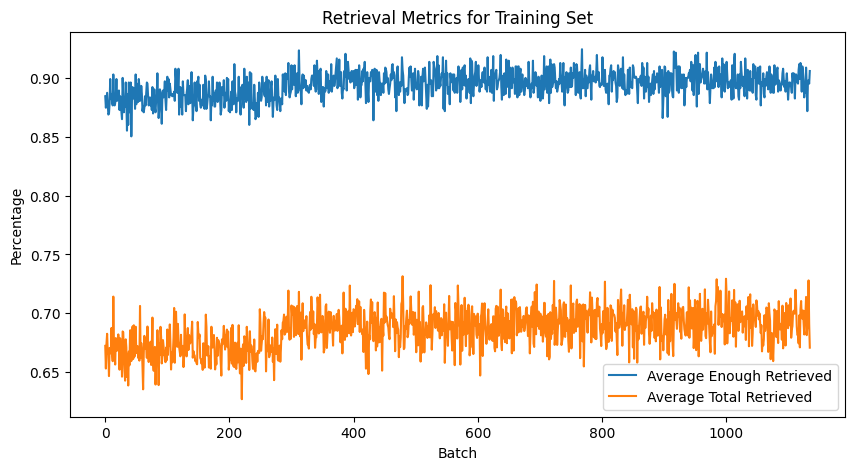

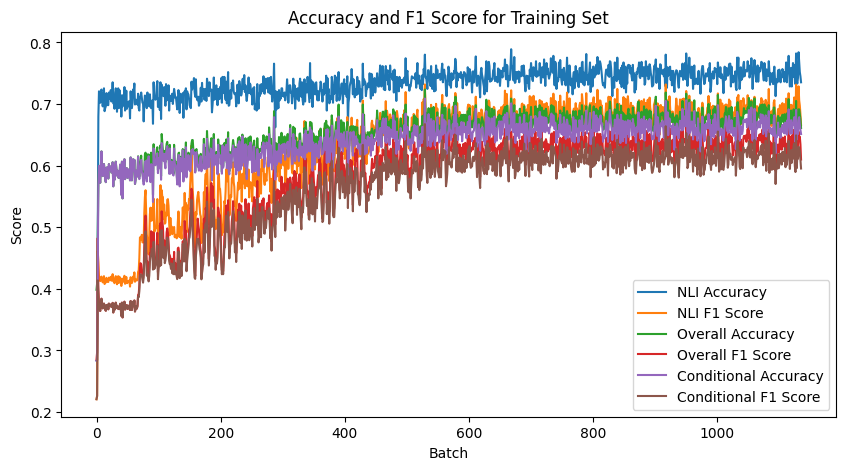

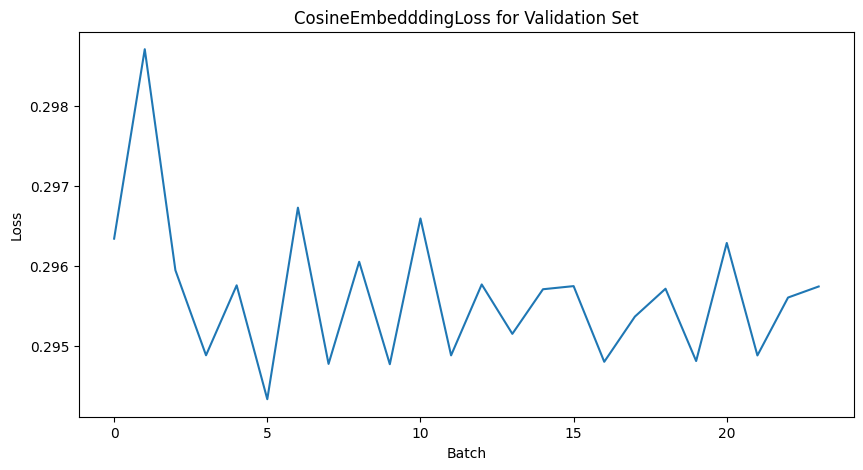

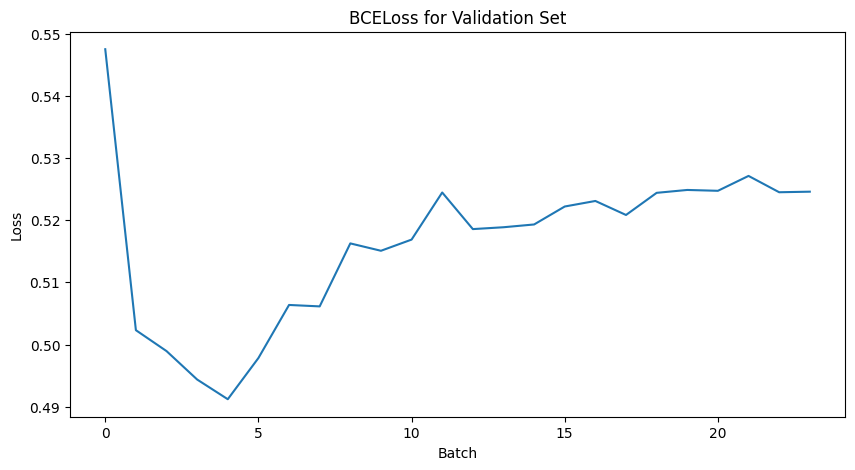

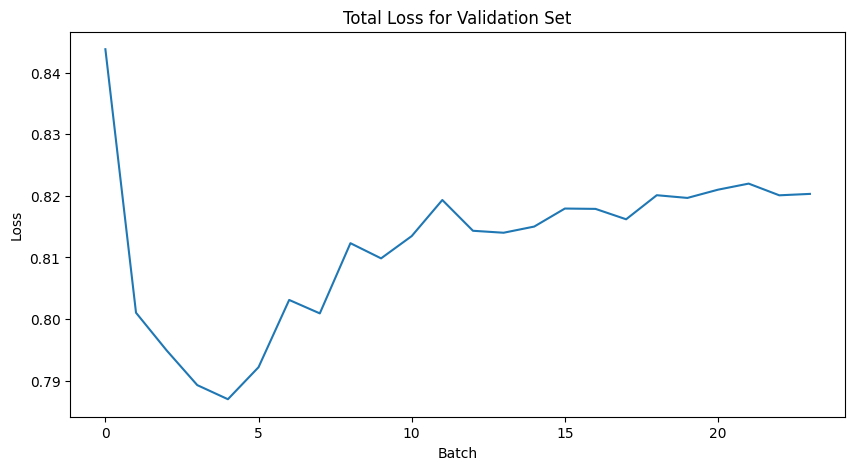

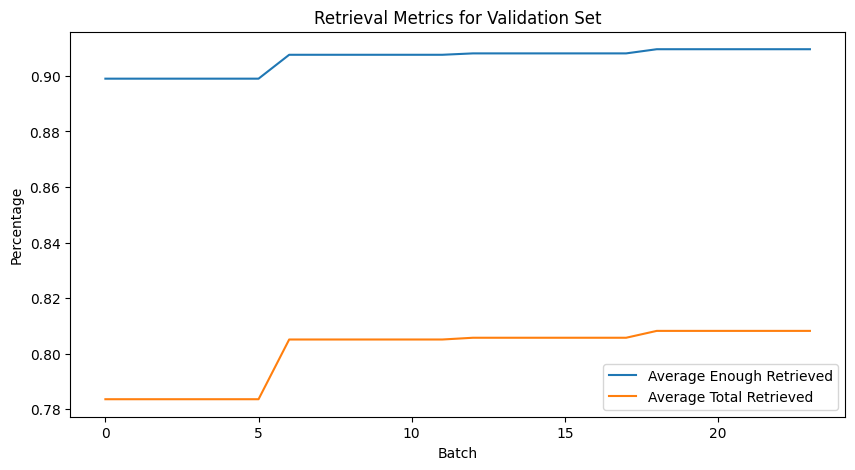

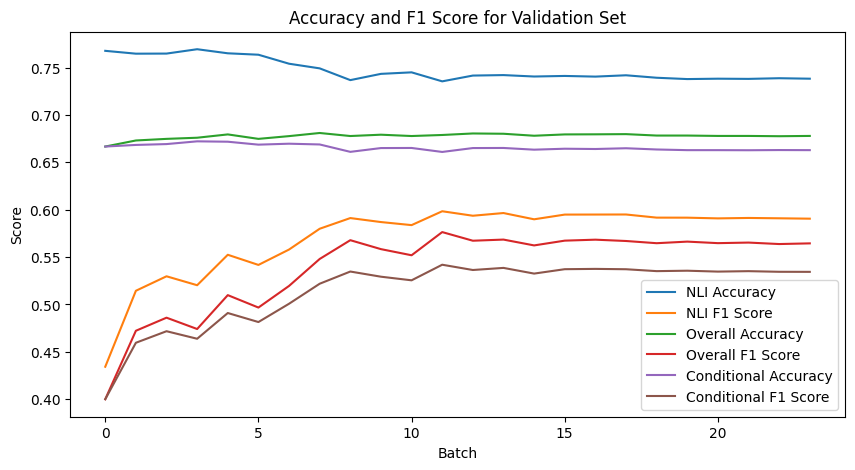

[0.283203125, 0.2841796875, 0.416015625, 0.5712890625, 0.599609375, 0.578125, 0.572265625, 0.599609375, 0.623046875, 0.5908203125, 0.5830078125, 0.5869140625, 0.6025390625, 0.591796875, 0.578125, 0.5732421875, 0.5966796875, 0.5947265625, 0.59765625, 0.5791015625, 0.6025390625, 0.59375, 0.5986328125, 0.595703125, 0.5888671875, 0.58984375, 0.60546875, 0.56640625, 0.6015625, 0.5771484375, 0.58984375, 0.6064453125, 0.5947265625, 0.583984375, 0.591796875, 0.5810546875, 0.580078125, 0.5830078125, 0.6015625, 0.5859375, 0.552734375, 0.6064453125, 0.546875, 0.595703125, 0.595703125, 0.6103515625, 0.578125, 0.591796875, 0.595703125, 0.595703125, 0.580078125, 0.591796875, 0.59375, 0.5849609375, 0.576171875, 0.61328125, 0.5810546875, 0.576171875, 0.595703125, 0.6103515625, 0.591796875, 0.609375, 0.5703125, 0.5771484375, 0.591796875, 0.58203125, 0.5869140625, 0.6142578125, 0.5908203125, 0.578125, 0.5947265625, 0.599609375, 0.609375, 0.58984375, 0.5869140625, 0.5771484375, 0.5693359375, 0.580078125,

In [1]:
from other_utils import print_progress
import json

# load tracking_train and tracking_eval from metrics
with open("metrics/tracking_train_v5.json", "r") as f:
    tracking_train = json.load(f)

with open("metrics/tracking_eval_v5.json", "r") as f:
    tracking_eval = json.load(f)

# for tracking_train enough_retrieved and total_retrived, divide the series in 7 blocks of equal length
# and calculate their mean
l = int(len(tracking_train["average_enough_retrieved"])/6)

# tracking_train["average_enough_retrieved"] = [sum(tracking_train["average_enough_retrieved"][i*l:(i+1)*l])/l for i in range(0, 6)]
# tracking_train["average_total_retrieved"] = [sum(tracking_train["average_total_retrieved"][i*l:(i+1)*l])/l for i in range(0, 6)]
# tracking_train["overall_f1"] = [sum(tracking_train["overall_f1"][i*l:(i+1)*l])/l for i in range(0, 6)]
# tracking_train["overall_accuracy"] = [sum(tracking_train["overall_accuracy"][i*l:(i+1)*l])/l for i in range(0, 6)]

print_progress(epoch=0, batch=1, num_total_batches=1, tracking_train=tracking_train, tracking_eval=tracking_eval, ma_ratio=0.0)
print(tracking_train["conditional_accuracy"])